<a href="https://colab.research.google.com/github/TanPMT/FlagDect/blob/main/DoAnNMTG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')




# Trích Xuất đặc trưng và 1 số bước tiền xử lí

In [ ]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import cv2
import os
import pandas as pd
from PIL import Image



def extract_color_histogram(image, bins=(8, 8, 8)):

    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Tính toán histogram màu sắc
    hist = cv2.calcHist([rgb], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    # Chuẩn hóa histogram
    cv2.normalize(hist, hist)
    # Trả về histogram đã làm phẳng
    return hist.flatten()


def load_and_extract_features(data_path):
    features = []
    labels = []
    for idx, filename in enumerate(os.listdir(data_path)):

    # Kiểm tra xem tệp có phải là ảnh không
      if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Đường dẫn đầy đủ đến tệp ảnh
        image_path = os.path.join(data_path, filename)
        label = filename.split(".")[0]
        # Đọc ảnh từ đường dẫn
        image = cv2.imread(image_path)


        # Tính đặc trưng của ảnh và thêm vào danh sách đặc trưng
        hist = extract_color_histogram(image)
            # if (label == 'Laos' or label == "Yemen" or label == "Vietnam" or label == "Japan" or label == "Jordan"):
        #   print(label)
        labels.append(label)
        features.append(hist)

    # Chuyển danh sách features và labels thành mảng numpy
    return np.array(features), np.array(labels)

# Đường dẫn đến các Dataset

In [ ]:
train_path = "/gdrive/MyDrive/TrainModel/Dataset2/train"
valid_path = "/gdrive/MyDrive/TrainModel/Dataset2/valid"

trainX, trainY = load_and_extract_features(train_path)
validX, validY = load_and_extract_features(valid_path)

test_path = "/gdrive/MyDrive/TrainModel/Dataset2/test"
testX, testY = load_and_extract_features(test_path)

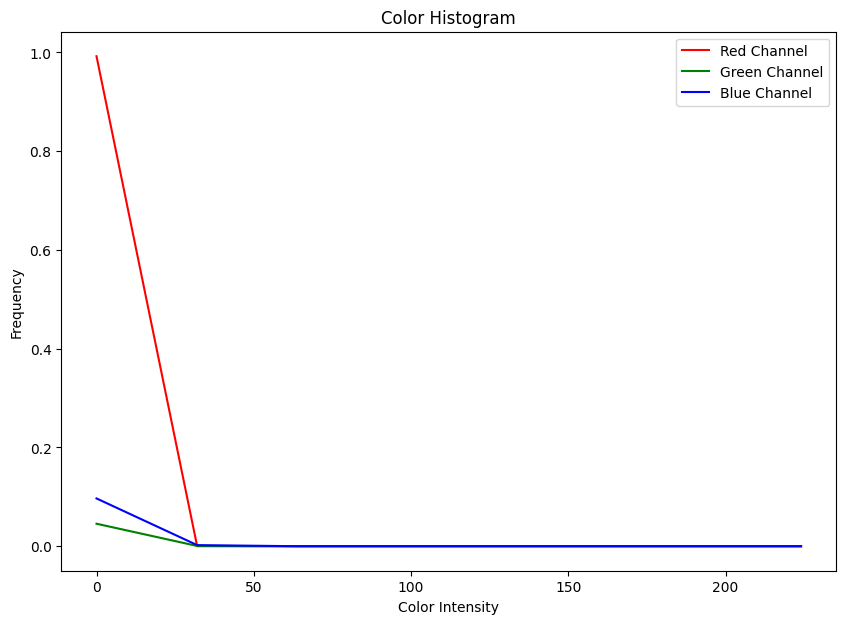

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def extract_color_histogram(image, bins=(8, 8, 8)):

    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    hist = cv2.calcHist([rgb], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])

    cv2.normalize(hist, hist)

    return hist.flatten()

def plot_color_histogram(hist, bins):
    """
    Plots a color histogram.
    :param hist: Flattened histogram array.
    :param bins: Number of bins for each color channel.
    """
    bin_edges = np.linspace(0, 256, num=bins[0]+1)

    plt.figure(figsize=(10, 7))

    for i, col in enumerate(['red', 'green', 'blue']):
        plt.plot(bin_edges[:-1], hist[i * bins[0]:(i + 1) * bins[0]], color=col, label=f'{col.capitalize()} Channel')

    plt.title('Color Histogram')
    plt.xlabel('Color Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Load an image
image_path = '/content/Afghanistan.11.jpg'  # Modify this
image = cv2.imread(image_path)

# Ensure the image was loaded
if image is not None:
    # Extract the color histogram
    histogram = extract_color_histogram(image)

    # Plot the color histogram
    plot_color_histogram(histogram, bins=(8, 8, 8))
else:
    print("Error: Image not found. Please check the path.")

# Mô hình RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
   )

rf_model.fit(trainX, trainY)
valid_pred = rf_model.predict(validX)
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set (Random Forest):", valid_acc)


Accuracy on validation set (Random Forest): 0.9037328094302554


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Random Forest với 10 cây quyết định
rf_model =RandomForestClassifier(
    n_estimators=200,  # Số lượng cây
    max_depth= None,  # Độ sâu tối đa của mỗi cây
    max_features='sqrt',  # Số lượng đặc trưng cần xem xét
    bootstrap=True,  # Sử dụng phương pháp bootstrap
    criterion='entropy',  # Tiêu chí để đánh giá chất lượng của một split
    n_jobs=-1  # Sử dụng tất cả các bộ xử lý có sẵn
)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
rf_model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = rf_model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set (Random Forest):", valid_acc)


Accuracy on validation set (Random Forest): 0.9115913555992141


In [ ]:
test_pred = rf_model.predict(testX)  # Sử dụng testX thay cho validX

# Đánh giá độ chính xác của mô hình trên tập test
test_acc = accuracy_score(testY, test_pred)  # Sử dụng testY thay cho validY
print(f'Accuracy on test set (RF):', test_acc)

Accuracy on test set (RF): 0.7851239669421488


In [ ]:
rf_model_ver2 = RandomForestClassifier(
    n_estimators=50,  # Số lượng cây
    max_depth=10,  # Độ sâu tối đa của mỗi cây
    min_samples_split=5,  # Số lượng mẫu tối thiểu để chia một nút
    min_samples_leaf=4,  # Số lượng mẫu tối thiểu ở mỗi lá
    max_features='sqrt',  # Số lượng đặc trưng cần xem xét
    bootstrap=True,  # Sử dụng phương pháp bootstrap
    criterion='entropy',  # Tiêu chí để đánh giá chất lượng của một split
    n_jobs=-1  # Sử dụng tất cả các bộ xử lý có sẵn
)

# Huấn luyện mô hình
rf_model_ver2.fit(trainX, trainY)


# Dự đoán nhãn cho dữ liệu validation
valid_pred = rf_model_ver2.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set (Random Forest):", valid_acc)

Accuracy on validation set (Random Forest): 0.8408644400785854


# Dò siêu tham số cho RandomForest

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed

# Giả định rằng trainX, trainY, validX, validY đã được định nghĩa trước đó

# Hàm để huấn luyện và đánh giá mô hình Random Forest
def evaluate_rf_model(n_estimators):
    # Khởi tạo mô hình Random Forest với siêu tham số n_estimators
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_features='sqrt',
        bootstrap=True,
        criterion='entropy',
        n_jobs=-1
    )

    # Huấn luyện mô hình trên tập huấn luyện
    rf_model.fit(trainX, trainY)

    # Dự đoán trên tập validation
    valid_pred = rf_model.predict(validX)

    # Tính toán độ chính xác trên tập validation
    valid_acc = accuracy_score(validY, valid_pred)

    return n_estimators, valid_acc

# Danh sách các giá trị n_estimators cần thử
n_estimators_list = list(range(10, 500, 30))

# Sử dụng ThreadPoolExecutor để thực hiện song song nhiều mô hình
with ThreadPoolExecutor() as executor:
    # Gửi các tác vụ tới executor
    futures = [executor.submit(evaluate_rf_model, n) for n in n_estimators_list]

    # Thu thập kết quả khi hoàn thành
    best_acc = 0
    best_n_estimators = 0
    for future in as_completed(futures):
        n_estimators, valid_acc = future.result()
        print(f'Accuracy on validation set (Random Forest, n_estimators={n_estimators}): {valid_acc}')
        if valid_acc > best_acc:
            best_acc = valid_acc
            best_n_estimators = n_estimators

print(f'Best n_estimators: {best_n_estimators} with accuracy: {best_acc}')


Accuracy on validation set (Random Forest, n_estimators=10): 0.793713163064833
Accuracy on validation set (Random Forest, n_estimators=40): 0.8212180746561886
Accuracy on validation set (Random Forest, n_estimators=70): 0.8487229862475442
Accuracy on validation set (Random Forest, n_estimators=100): 0.8644400785854617
Accuracy on validation set (Random Forest, n_estimators=130): 0.8722986247544204
Accuracy on validation set (Random Forest, n_estimators=160): 0.8801571709233792
Accuracy on validation set (Random Forest, n_estimators=190): 0.8722986247544204
Accuracy on validation set (Random Forest, n_estimators=220): 0.8546168958742633
Accuracy on validation set (Random Forest, n_estimators=250): 0.8781925343811395
Accuracy on validation set (Random Forest, n_estimators=280): 0.8781925343811395
Accuracy on validation set (Random Forest, n_estimators=310): 0.8683693516699411
Accuracy on validation set (Random Forest, n_estimators=340): 0.8801571709233792
Accuracy on validation set (Rand

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed

# Giả định rằng trainX, trainY, validX, validY đã được định nghĩa trước đó

# Hàm để huấn luyện và đánh giá mô hình Random Forest
def evaluate_rf_model(max_depth):
    # Khởi tạo mô hình Random Forest với siêu tham số max_depth
    rf_model = RandomForestClassifier(
        n_estimators=400,  # Sử dụng giá trị cố định cho n_estimators hoặc giá trị tốt nhất từ trước
        max_depth=max_depth,
        max_features='sqrt',
        bootstrap=True,
        criterion='entropy',
        n_jobs=-1
    )

    # Huấn luyện mô hình trên tập huấn luyện
    rf_model.fit(trainX, trainY)

    # Dự đoán trên tập validation
    valid_pred = rf_model.predict(validX)

    # Tính toán độ chính xác trên tập validation
    valid_acc = accuracy_score(validY, valid_pred)

    return max_depth, valid_acc

# Danh sách các giá trị max_depth cần thử
max_depth_list = list(range(20, 60))  # Ví dụ từ 5 đến 20

# Sử dụng ThreadPoolExecutor để thực hiện song song nhiều mô hình
with ThreadPoolExecutor() as executor:
    # Gửi các tác vụ tới executor
    futures = [executor.submit(evaluate_rf_model, md) for md in max_depth_list]

    # Thu thập kết quả khi hoàn thành
    best_acc = 0
    best_max_depth = 0
    for future in as_completed(futures):
        max_depth, valid_acc = future.result()
        print(f'Accuracy on validation set (Random Forest, max_depth={max_depth}): {valid_acc}')
        if valid_acc > best_acc:
            best_acc = valid_acc
            best_max_depth = max_depth

print(f'Best max_depth: {best_max_depth} with accuracy: {best_acc}')


Accuracy on validation set (Random Forest, max_depth=23): 0.9096267190569745
Accuracy on validation set (Random Forest, max_depth=24): 0.9096267190569745
Accuracy on validation set (Random Forest, max_depth=22): 0.9076620825147348
Accuracy on validation set (Random Forest, max_depth=21): 0.9115913555992141
Accuracy on validation set (Random Forest, max_depth=20): 0.9076620825147348
Accuracy on validation set (Random Forest, max_depth=25): 0.9115913555992141
Accuracy on validation set (Random Forest, max_depth=27): 0.9135559921414538
Accuracy on validation set (Random Forest, max_depth=28): 0.9076620825147348
Accuracy on validation set (Random Forest, max_depth=26): 0.9096267190569745
Accuracy on validation set (Random Forest, max_depth=30): 0.9135559921414538
Accuracy on validation set (Random Forest, max_depth=31): 0.9135559921414538
Accuracy on validation set (Random Forest, max_depth=29): 0.9096267190569745
Accuracy on validation set (Random Forest, max_depth=32): 0.9017681728880157

# Dò siêu tham số cho RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Giả sử bạn đang làm việc với bài toán phân loại
rf = RandomForestClassifier(
    n_estimators=100,  # Số lượng cây
    max_features='sqrt',  # Số lượng đặc trưng cần xem xét
    bootstrap=True,  # Sử dụng phương pháp bootstrap
    criterion='entropy',  # Tiêu chí để đánh giá chất lượng của một split
    n_jobs=-1  # Sử dụng tất cả các bộ xử lý có sẵn

)

param_grid = {
    'max_depth': [None, 30, 40, 50, 60, 70],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(trainX, trainY)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Áp dụng các tham số tốt nhất vào mô hình
best_rf = grid_search.best_estimator_
best_rf.fit(trainX, trainY)


Best parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.6910064500425946


RandomForestClassifier(criterion='entropy', max_depth=50, n_jobs=-1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Giả sử bạn đang làm việc với bài toán phân loại
rf = RandomForestClassifier(
    n_estimators=100,  # Số lượng cây
    max_features='sqrt',  # Số lượng đặc trưng cần xem xét
    bootstrap=True,  # Sử dụng phương pháp bootstrap
    criterion='entropy',  # Tiêu chí để đánh giá chất lượng của một split
    n_jobs=-1  # Sử dụng tất cả các bộ xử lý có sẵn

)

param_grid = {
    'max_depth': [None, 30, 40, 50, 60, 70],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 3, 5, 7, 9]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(trainX, trainY)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Áp dụng các tham số tốt nhất vào mô hình
best_rf = grid_search.best_estimator_
best_rf.fit(trainX, trainY)


Best parameters: {'max_depth': 60, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best cross-validation score: 0.6918182534057801


RandomForestClassifier(criterion='entropy', max_depth=60, min_samples_split=4,
                       n_jobs=-1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(
    n_estimators=500,  # Số lượng cây
    max_depth=50,  # Độ sâu tối đa của mỗi cây
    min_samples_split=2,  # Số lượng mẫu tối thiểu để chia một nút
    min_samples_leaf=1,  # Số lượng mẫu tối thiểu ở mỗi lá
    max_features='sqrt',  # Số lượng đặc trưng cần xem xét
    bootstrap=True,  # Sử dụng phương pháp bootstrap
    criterion='entropy',  # Tiêu chí để đánh giá chất lượng của một split
    n_jobs=-1,  # Sử dụng tất cả các bộ xử lý có sẵn
    random_state=42,
   )

rf_model.fit(trainX, trainY)
valid_pred = rf_model.predict(validX)
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set (Random Forest):", valid_acc)


Accuracy on validation set (Random Forest): 0.925343811394892


In [ ]:


# Dự đoán nhãn cho dữ liệu validation
valid_pred = rf_model.predict(testX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(testY, valid_pred)
print("Accuracy on validation set (Random Forest):", valid_acc)




Accuracy on validation set (Random Forest): 0.9421487603305785


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Định nghĩa bộ tham số cần tìm kiếm
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

# Khởi tạo mô hình Random Forest với các tham số cố định
rf_model = RandomForestClassifier(
    max_depth=50,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    criterion='entropy',
    n_jobs=-1,
    random_state=42
)

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Huấn luyện mô hình
grid_search.fit(trainX, trainY)

# In ra bộ tham số tốt nhất
print(f'Best parameters found: {grid_search.best_params_}')

# Lấy ra mô hình tốt nhất từ kết quả grid search
best_rf_model = grid_search.best_estimator_

# Đánh giá trên tập validation
valid_pred = best_rf_model.predict(validX)
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set (Random Forest with Grid Search):", valid_acc)


Best parameters found: {'n_estimators': 500}
Accuracy on validation set (Random Forest with Grid Search): 0.925343811394892


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Random Forest với các tham số cụ thể
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
rf_model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = rf_model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set (Random Forest):", valid_acc)

# Sử dụng GridSearchCV để tìm các tham số tối ưu
param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(trainX, trainY)

# In các tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Accuracy on validation set (Random Forest): 0.8369351669941061
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score:  0.6650615302300695


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed

# Giả định rằng trainX, trainY, validX, validY đã được định nghĩa trước đó

# Hàm để huấn luyện và đánh giá mô hình Random Forest
def evaluate_rf_model(max_depth):
    # Khởi tạo mô hình Random Forest với siêu tham số max_depth
    rf_model = RandomForestClassifier(
        n_estimators=400,  # Bạn có thể điều chỉnh số lượng cây phù hợp
        max_depth=max_depth,
        min_samples_split=5,
        min_samples_leaf=4,
        max_features='sqrt',
        bootstrap=True,
        criterion='entropy',
        n_jobs=-1
    )

    # Huấn luyện mô hình trên tập huấn luyện
    rf_model.fit(trainX, trainY)

    # Dự đoán trên tập validation
    valid_pred = rf_model.predict(validX)

    # Tính toán độ chính xác trên tập validation
    valid_acc = accuracy_score(validY, valid_pred)

    return max_depth, valid_acc

# Danh sách các giá trị max_depth cần thử
max_depth_list = list(range(5, 21, 2))

# Sử dụng ThreadPoolExecutor để thực hiện song song nhiều mô hình
with ThreadPoolExecutor() as executor:
    # Gửi các tác vụ tới executor
    futures = [executor.submit(evaluate_rf_model, md) for md in max_depth_list]

    # Thu thập kết quả khi hoàn thành
    best_acc = 0
    best_max_depth = 0
    for future in as_completed(futures):
        max_depth, valid_acc = future.result()
        print(f'Accuracy on validation set (Random Forest, max_depth={max_depth}): {valid_acc}')
        if valid_acc > best_acc:
            best_acc = valid_acc
            best_max_depth = max_depth

print(f'Best max_depth: {best_max_depth} with accuracy: {best_acc}')


Accuracy on validation set (Random Forest, max_depth=5): 0.6463654223968566
Accuracy on validation set (Random Forest, max_depth=7): 0.7603143418467584
Accuracy on validation set (Random Forest, max_depth=9): 0.8546168958742633
Accuracy on validation set (Random Forest, max_depth=11): 0.8801571709233792
Accuracy on validation set (Random Forest, max_depth=15): 0.8958742632612967
Accuracy on validation set (Random Forest, max_depth=13): 0.888015717092338
Accuracy on validation set (Random Forest, max_depth=17): 0.8899803536345776
Accuracy on validation set (Random Forest, max_depth=19): 0.8958742632612967
Best max_depth: 15 with accuracy: 0.8958742632612967


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed

# Giả định rằng trainX, trainY, validX, validY đã được định nghĩa trước đó

# Hàm để huấn luyện và đánh giá mô hình Random Forest
def evaluate_rf_model(min_samp):
    # Khởi tạo mô hình Random Forest với siêu tham số max_depth
    rf_model = RandomForestClassifier(
        n_estimators=400,  # Bạn có thể điều chỉnh số lượng cây phù hợp
        max_depth=15,
        min_samples_split= min_samp,
        min_samples_leaf=4,
        max_features='sqrt',
        bootstrap=True,
        criterion='entropy',
        n_jobs=-1
    )

    # Huấn luyện mô hình trên tập huấn luyện
    rf_model.fit(trainX, trainY)

    # Dự đoán trên tập validation
    valid_pred = rf_model.predict(validX)

    # Tính toán độ chính xác trên tập validation
    valid_acc = accuracy_score(validY, valid_pred)

    return min_samp, valid_acc

# Danh sách các giá trị max_depth cần thử
min_samp_list = list(range(3, 21, 2))

# Sử dụng ThreadPoolExecutor để thực hiện song song nhiều mô hình
with ThreadPoolExecutor() as executor:
    # Gửi các tác vụ tới executor
    futures = [executor.submit(evaluate_rf_model, md) for md in min_samp_list]

    # Thu thập kết quả khi hoàn thành
    best_acc = 0
    best_max_depth = 0
    for future in as_completed(futures):
        max_depth, valid_acc = future.result()
        print(f'Accuracy on validation set (Random Forest, min_samp={max_depth}): {valid_acc}')
        if valid_acc > best_acc:
            best_acc = valid_acc
            best_max_depth = max_depth

print(f'Best min_samp: {best_max_depth} with accuracy: {best_acc}')


Accuracy on validation set (Random Forest, min_samp=13): 0.8781925343811395
Accuracy on validation set (Random Forest, min_samp=7): 0.8978388998035364
Accuracy on validation set (Random Forest, min_samp=11): 0.8939096267190569
Accuracy on validation set (Random Forest, min_samp=9): 0.9037328094302554
Accuracy on validation set (Random Forest, min_samp=5): 0.8840864440078585
Accuracy on validation set (Random Forest, min_samp=3): 0.888015717092338
Accuracy on validation set (Random Forest, min_samp=17): 0.8703339882121808
Accuracy on validation set (Random Forest, min_samp=15): 0.8821218074656189
Accuracy on validation set (Random Forest, min_samp=19): 0.8605108055009824
Best min_samp: 9 with accuracy: 0.9037328094302554


In [ ]:
rf_model_ver2 = RandomForestClassifier(
    n_estimators= 160, # Số lượng cây
    max_depth=15,  # Độ sâu tối đa của mỗi cây
    min_samples_split=9,  # Số lượng mẫu tối thiểu để chia một nút
    min_samples_leaf=2,  # Số lượng mẫu tối thiểu ở mỗi lá
    max_features='sqrt',  # Số lượng đặc trưng cần xem xét
    bootstrap=True,  # Sử dụng phương pháp bootstrap
    criterion='entropy',  # Tiêu chí để đánh giá chất lượng của một split
    n_jobs=-1  # Sử dụng tất cả các bộ xử lý có sẵn
)

# Huấn luyện mô hình
rf_model_ver2.fit(trainX, trainY)


# Dự đoán nhãn cho dữ liệu validation
valid_pred = rf_model_ver2.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set (Random Forest):", valid_acc)

Accuracy on validation set (Random Forest): 0.9256198347107438


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed

# Giả định rằng trainX, trainY, validX, validY đã được định nghĩa trước đó

# Hàm để huấn luyện và đánh giá mô hình Random Forest
def evaluate_rf_model(min_leaf):
    # Khởi tạo mô hình Random Forest với siêu tham số max_depth
    rf_model = RandomForestClassifier(
        n_estimators=400,  # Bạn có thể điều chỉnh số lượng cây phù hợp
        max_depth=15,
        min_samples_split= 9,
        min_samples_leaf= min_leaf,
        max_features='sqrt',
        bootstrap=True,
        criterion='entropy',
        n_jobs=-1
    )

    # Huấn luyện mô hình trên tập huấn luyện
    rf_model.fit(trainX, trainY)

    # Dự đoán trên tập validation
    valid_pred = rf_model.predict(validX)

    # Tính toán độ chính xác trên tập validation
    valid_acc = accuracy_score(validY, valid_pred)

    return min_leaf, valid_acc

# Danh sách các giá trị max_depth cần thử
min_leaf_list = list(range(2, 20, 2))

# Sử dụng ThreadPoolExecutor để thực hiện song song nhiều mô hình
with ThreadPoolExecutor() as executor:
    # Gửi các tác vụ tới executor
    futures = [executor.submit(evaluate_rf_model, md) for md in min_leaf_list]

    # Thu thập kết quả khi hoàn thành
    best_acc = 0
    best_max_depth = 0
    for future in as_completed(futures):
        max_depth, valid_acc = future.result()
        print(f'Accuracy on validation set (Random Forest, min_leaf={max_depth}): {valid_acc}')
        if valid_acc > best_acc:
            best_acc = valid_acc
            best_max_depth = max_depth

print(f'Best min_leaf: {best_max_depth} with accuracy: {best_acc}')


Accuracy on validation set (Random Forest, min_leaf=12): 0.8369351669941061
Accuracy on validation set (Random Forest, min_leaf=10): 0.8526522593320236
Accuracy on validation set (Random Forest, min_leaf=8): 0.8664047151277013
Accuracy on validation set (Random Forest, min_leaf=6): 0.8840864440078585
Accuracy on validation set (Random Forest, min_leaf=4): 0.8899803536345776
Accuracy on validation set (Random Forest, min_leaf=2): 0.8978388998035364
Accuracy on validation set (Random Forest, min_leaf=14): 0.8113948919449901
Accuracy on validation set (Random Forest, min_leaf=16): 0.8074656188605108
Accuracy on validation set (Random Forest, min_leaf=18): 0.787819253438114
Best min_leaf: 2 with accuracy: 0.8978388998035364


In [ ]:
from sklearn.metrics import classification_report

# Dùng mô hình đã huấn luyện để dự đoán trên tập validation
#valid_pred = rf_model.predict(validX)
valid_pred = rf_model_ver2.predict(validX)
# Tính toán các giá trị đánh giá
report = classification_report(validY, valid_pred)

# In ra báo cáo
print("Classification Report:")
print(report)


Classification Report:
                      precision    recall  f1-score   support

         Afghanistan       1.00      1.00      1.00         9
             Armenia       1.00      1.00      1.00         8
          Azerbaijan       1.00      1.00      1.00        11
             Bahrain       0.70      0.70      0.70        10
          Bangladesh       1.00      1.00      1.00         8
              Bhutan       1.00      1.00      1.00        11
              Brunei       1.00      1.00      1.00        12
            Cambodia       1.00      0.89      0.94        19
               China       1.00      1.00      1.00        13
              Cyprus       1.00      1.00      1.00         7
             Georgia       1.00      1.00      1.00        10
               India       1.00      1.00      1.00        12
           Indonesia       0.89      1.00      0.94        17
                Iran       1.00      1.00      1.00        10
                Iraq       0.30      0.43     

# **Phương pháp eXtreme Gradient Boosting**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
# Khởi tạo một LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi các nhãn từ chuỗi sang số nguyên
trainY_encoded = label_encoder.fit_transform(trainY)
validY_encoded = label_encoder.transform(validY)  # Chúng ta chỉ sử dụng transform ở đây vì đã fit trên trainY

# Khởi tạo mô hình XGBoost với các tham số tùy chỉnh (có thể điều chỉnh)
model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY_encoded là nhãn đã được chuyển đổi)
model.fit(trainX, trainY_encoded)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY_encoded, valid_pred)
print("Accuracy on validation set:", valid_acc)



Accuracy on validation set: 0.9037328094302554


In [ ]:
from sklearn.metrics import classification_report

# Dùng mô hình đã huấn luyện để dự đoán trên tập validation
#valid_pred = rf_model.predict(validX)
valid_pred = model.predict(validX)
# Tính toán các giá trị đánh giá
report = classification_report(validY_encoded, valid_pred)

# In ra báo cáo
print("Classification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.62      0.77         8
           2       0.92      1.00      0.96        11
           3       0.60      0.60      0.60        10
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        12
           7       1.00      0.89      0.94        19
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        10
          11       1.00      0.92      0.96        12
          12       0.89      0.94      0.91        17
          13       1.00      0.90      0.95        10
          14       0.29      0.71      0.42         7
          15       0.83      1.00      0.91         5
          16       0.86      0.86      0.86        14
    

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
# Khởi tạo một LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi các nhãn từ chuỗi sang số nguyên
trainY_encoded = label_encoder.fit_transform(trainY)
testY_encoded = label_encoder.transform(testY)  # Chúng ta chỉ sử dụng transform ở đây vì đã fit trên trainY

# Khởi tạo mô hình XGBoost với các tham số tùy chỉnh (có thể điều chỉnh)
model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY_encoded là nhãn đã được chuyển đổi)
model.fit(trainX, trainY_encoded)

# Dự đoán nhãn cho dữ liệu validation
test_pred = model.predict(testX)

# Đánh giá độ chính xác của mô hình trên tập validation
test_acc = accuracy_score(testY_encoded, test_pred)
print("Accuracy on validation set:", test_acc)



Accuracy on validation set: 0.9338842975206612


# Dò siêu tham số XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np

# Giả sử trainX, trainY, validX, validY đã được định nghĩa trước đó

# Khởi tạo một LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi các nhãn từ chuỗi sang số nguyên
trainY_encoded = label_encoder.fit_transform(trainY)
validY_encoded = label_encoder.transform(validY)  # Chúng ta chỉ sử dụng transform ở đây vì đã fit trên trainY

# Khởi tạo mô hình XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Định nghĩa lưới các siêu tham số để dò tìm
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Sử dụng RandomizedSearchCV để tìm siêu tham số tốt nhất
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Số lần thử nghiệm ngẫu nhiên
    scoring='accuracy',
    n_jobs=-1,  # Sử dụng tất cả các CPU
    cv=3,  # Sử dụng 3-fold cross-validation
    verbose=1,
    random_state=42
)

# Huấn luyện mô hình trên dữ liệu huấn luyện
random_search.fit(trainX, trainY_encoded)

# Tìm siêu tham số tốt nhất
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Đánh giá mô hình với tập siêu tham số tốt nhất trên tập validation
best_model = random_search.best_estimator_
valid_pred = best_model.predict(validX)
valid_acc = accuracy_score(validY_encoded, valid_pred)
print("Accuracy on validation set:", valid_acc)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found:  {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy on validation set: 0.9037328094302554


# Phương pháp BaggingClassifier


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



  # Khởi tạo mô hình Decision Tree
base_model = DecisionTreeClassifier()

# Khởi tạo mô hình Bagging với Decision Tree làm mô hình cơ sở
bagging_model = BaggingClassifier(base_model, n_estimators=125,max_features=0.4)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
bagging_model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = bagging_model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print(f'Accuracy on validation set (Bagging):', valid_acc)

Accuracy on validation set (Bagging): 0.9115913555992141


In [ ]:
test_pred = bagging_model.predict(testX)  # Sử dụng testX thay cho validX

# Đánh giá độ chính xác của mô hình trên tập test
test_acc = accuracy_score(testY, test_pred)  # Sử dụng testY thay cho validY
print(f'Accuracy on test set (Bagging):', test_acc)

Accuracy on test set (Bagging): 0.9256198347107438


In [ ]:
from sklearn.metrics import classification_report

# Dùng mô hình đã huấn luyện để dự đoán trên tập validation
#valid_pred = rf_model.predict(validX)
valid_pred = bagging_model.predict(validX)
# Tính toán các giá trị đánh giá
report = classification_report(validY, valid_pred)

# In ra báo cáo
print("Classification Report:")
print(report)

Classification Report:
                      precision    recall  f1-score   support

         Afghanistan       1.00      1.00      1.00         9
             Armenia       1.00      0.75      0.86         8
          Azerbaijan       1.00      1.00      1.00        11
             Bahrain       0.64      0.70      0.67        10
          Bangladesh       1.00      1.00      1.00         8
              Bhutan       1.00      1.00      1.00        11
              Brunei       1.00      1.00      1.00        12
            Cambodia       1.00      0.95      0.97        19
               China       1.00      1.00      1.00        13
              Cyprus       1.00      1.00      1.00         7
             Georgia       1.00      1.00      1.00        10
               India       1.00      1.00      1.00        12
           Indonesia       1.00      1.00      1.00        17
                Iran       1.00      1.00      1.00        10
                Iraq       0.27      0.43     

# Dò siêu tham số BaggingClassifer

In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed

# Assume trainX, trainY, validX, validY are predefined

# Function to train and evaluate the Bagging model
def evaluate_bagging_model(n_estimators):
    base_model = DecisionTreeClassifier()  # Initialize the base Decision Tree model

    # Initialize Bagging with the base model
    bagging_model = BaggingClassifier(base_model, n_estimators=n_estimators)

    # Train the Bagging model on the training data
    bagging_model.fit(trainX, trainY)

    # Predict on the validation set
    valid_pred = bagging_model.predict(validX)

    # Calculate accuracy on the validation set
    valid_acc = accuracy_score(validY, valid_pred)

    return n_estimators, valid_acc

# List of n_estimators values to try
n_estimators_list = list(range(10, 500, 30))

# Use ThreadPoolExecutor to run multiple evaluations in parallel
with ThreadPoolExecutor() as executor:
    # Submit tasks to the executor
    futures = [executor.submit(evaluate_bagging_model, n) for n in n_estimators_list]

    # Collect the results as they complete
    for future in as_completed(futures):
        n_estimators, valid_acc = future.result()
        print(f'Accuracy on validation set (Bagging, n_estimators={n_estimators}): {valid_acc}')


Accuracy on validation set (Bagging, n_estimators=10): 0.8133595284872298
Accuracy on validation set (Bagging, n_estimators=40): 0.8781925343811395
Accuracy on validation set (Bagging, n_estimators=70): 0.8958742632612967
Accuracy on validation set (Bagging, n_estimators=100): 0.9076620825147348
Accuracy on validation set (Bagging, n_estimators=130): 0.9037328094302554
Accuracy on validation set (Bagging, n_estimators=160): 0.9096267190569745
Accuracy on validation set (Bagging, n_estimators=190): 0.888015717092338
Accuracy on validation set (Bagging, n_estimators=220): 0.899803536345776
Accuracy on validation set (Bagging, n_estimators=250): 0.9174852652259332
Accuracy on validation set (Bagging, n_estimators=280): 0.9076620825147348
Accuracy on validation set (Bagging, n_estimators=310): 0.9096267190569745
Accuracy on validation set (Bagging, n_estimators=340): 0.9056974459724951
Accuracy on validation set (Bagging, n_estimators=370): 0.9096267190569745
Accuracy on validation set (Ba

In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed

# Assume trainX, trainY, validX, validY are predefined

# Function to train and evaluate the Bagging model
def evaluate_bagging_model(n_estimators):
    base_model = DecisionTreeClassifier()  # Initialize the base Decision Tree model

    # Initialize Bagging with the base model
    bagging_model = BaggingClassifier(base_model, n_estimators=n_estimators)

    # Train the Bagging model on the training data
    bagging_model.fit(trainX, trainY)

    # Predict on the validation set
    valid_pred = bagging_model.predict(validX)

    # Calculate accuracy on the validation set
    valid_acc = accuracy_score(validY, valid_pred)

    return n_estimators, valid_acc

# List of n_estimators values to try
n_estimators_list = list(range(100, 130, 1))

# Use ThreadPoolExecutor to run multiple evaluations in parallel
with ThreadPoolExecutor() as executor:
    # Submit tasks to the executor
    futures = [executor.submit(evaluate_bagging_model, n) for n in n_estimators_list]

    # Collect the results as they complete
    for future in as_completed(futures):
        n_estimators, valid_acc = future.result()
        print(f'Accuracy on validation set (Bagging, n_estimators={n_estimators}): {valid_acc}')

Accuracy on validation set (Bagging, n_estimators=100): 0.9017681728880157
Accuracy on validation set (Bagging, n_estimators=101): 0.8939096267190569
Accuracy on validation set (Bagging, n_estimators=102): 0.9056974459724951
Accuracy on validation set (Bagging, n_estimators=103): 0.899803536345776
Accuracy on validation set (Bagging, n_estimators=104): 0.9017681728880157
Accuracy on validation set (Bagging, n_estimators=105): 0.8899803536345776
Accuracy on validation set (Bagging, n_estimators=106): 0.888015717092338
Accuracy on validation set (Bagging, n_estimators=107): 0.8899803536345776
Accuracy on validation set (Bagging, n_estimators=108): 0.8978388998035364
Accuracy on validation set (Bagging, n_estimators=109): 0.9096267190569745
Accuracy on validation set (Bagging, n_estimators=110): 0.9017681728880157
Accuracy on validation set (Bagging, n_estimators=111): 0.8840864440078585
Accuracy on validation set (Bagging, n_estimators=112): 0.9017681728880157
Accuracy on validation set 

In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed

# Assume trainX, trainY, validX, validY are predefined

# Function to train and evaluate the Bagging model
def evaluate_bagging_model(n_estimators, max_samples):
    base_model = DecisionTreeClassifier()  # Initialize the base Decision Tree model

    # Initialize Bagging with the base model and max_samples
    bagging_model = BaggingClassifier(base_model, n_estimators=n_estimators, max_samples=max_samples)

    # Train the Bagging model on the training data
    bagging_model.fit(trainX, trainY)

    # Predict on the validation set
    valid_pred = bagging_model.predict(validX)

    # Calculate accuracy on the validation set
    valid_acc = accuracy_score(validY, valid_pred)

    return max_samples, valid_acc

# Fixed value for n_estimators
n_estimators = 125

# Range of max_samples values to try (for example, from 0.1 to 1.0 in steps of 0.1)
max_samples_list = np.arange(0.1, 1, 0.1)

# Use ThreadPoolExecutor to run multiple evaluations in parallel
with ThreadPoolExecutor() as executor:
    # Submit tasks to the executor
    futures = {executor.submit(evaluate_bagging_model, n_estimators, max_sample): max_sample for max_sample in max_samples_list}

    # Collect the results as they complete
    for future in as_completed(futures):
        max_samples = futures[future]
        try:
            max_samples, valid_acc = future.result()
            print(f'Accuracy on validation set (Bagging, n_estimators={n_estimators}, max_samples={max_samples}): {valid_acc}')
        except Exception as e:
            print(f'Model evaluation failed for max_samples={max_samples}: {e}')

Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.1): 0.825147347740668
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.2): 0.8703339882121808
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.30000000000000004): 0.8781925343811395
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.4): 0.8840864440078585
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.5): 0.8919449901768173
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.6): 0.9115913555992141
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.7000000000000001): 0.8978388998035364
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.8): 0.8958742632612967
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.9): 0.9155206286836935


In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed

# Assume trainX, trainY, validX, validY are predefined

# Function to train and evaluate the Bagging model
def evaluate_bagging_model(n_estimators, max_samples):
    base_model = DecisionTreeClassifier()  # Initialize the base Decision Tree model

    # Initialize Bagging with the base model and max_samples
    bagging_model = BaggingClassifier(base_model, n_estimators=n_estimators, max_samples=max_samples)

    # Train the Bagging model on the training data
    bagging_model.fit(trainX, trainY)

    # Predict on the validation set
    valid_pred = bagging_model.predict(validX)

    # Calculate accuracy on the validation set
    valid_acc = accuracy_score(validY, valid_pred)

    return max_samples, valid_acc

# Fixed value for n_estimators
n_estimators = 125

# Range of max_samples values to try (for example, from 0.1 to 1.0 in steps of 0.1)
max_samples_list = np.arange(1, 1.1, 0.1)

# Use ThreadPoolExecutor to run multiple evaluations in parallel
with ThreadPoolExecutor() as executor:
    # Submit tasks to the executor
    futures = {executor.submit(evaluate_bagging_model, n_estimators, max_sample): max_sample for max_sample in max_samples_list}

    # Collect the results as they complete
    for future in as_completed(futures):
        max_samples = futures[future]
        try:
            max_samples, valid_acc = future.result()
            print(f'Accuracy on validation set (Bagging, n_estimators={n_estimators}, max_samples={max_samples}): {valid_acc}')
        except Exception as e:
            print(f'Model evaluation failed for max_samples={max_samples}: {e}')

Model evaluation failed for max_samples=1.1: The 'max_samples' parameter of BaggingClassifier must be an int in the range [1, inf) or a float in the range (0, 1]. Got 1.1 instead.
Accuracy on validation set (Bagging, n_estimators=125, max_samples=1.0): 0.9017681728880157


In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed

# Assume trainX, trainY, validX, validY are predefined

# Function to train and evaluate the Bagging model
def evaluate_bagging_model(n_estimators, max_samples):
    base_model = DecisionTreeClassifier()  # Initialize the base Decision Tree model

    # Initialize Bagging with the base model and max_samples
    bagging_model = BaggingClassifier(base_model, n_estimators=n_estimators, max_samples=max_samples)

    # Train the Bagging model on the training data
    bagging_model.fit(trainX, trainY)

    # Predict on the validation set
    valid_pred = bagging_model.predict(validX)

    # Calculate accuracy on the validation set
    valid_acc = accuracy_score(validY, valid_pred)

    return max_samples, valid_acc

# Fixed value for n_estimators
n_estimators = 125

# Range of max_samples values to try (for example, from 0.1 to 1.0 in steps of 0.1)
max_samples_list = np.arange(0.9, 1, 0.01)

# Use ThreadPoolExecutor to run multiple evaluations in parallel
with ThreadPoolExecutor() as executor:
    # Submit tasks to the executor
    futures = {executor.submit(evaluate_bagging_model, n_estimators, max_sample): max_sample for max_sample in max_samples_list}

    # Collect the results as they complete
    for future in as_completed(futures):
        max_samples = futures[future]
        try:
            max_samples, valid_acc = future.result()
            print(f'Accuracy on validation set (Bagging, n_estimators={n_estimators}, max_samples={max_samples}): {valid_acc}')
        except Exception as e:
            print(f'Model evaluation failed for max_samples={max_samples}: {e}')

Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.9): 0.9096267190569745
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.91): 0.8919449901768173
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.92): 0.8978388998035364
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.93): 0.9056974459724951
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.9400000000000001): 0.9037328094302554
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.9500000000000001): 0.899803536345776
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.9600000000000001): 0.8958742632612967
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.9700000000000001): 0.9135559921414538
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.9800000000000001): 0.9017681728880157
Accuracy on validation set (Bagging, n_estimators=125, max_samples=0.9900000000000001): 0.89783

In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed

# Assume trainX, trainY, validX, validY are predefined

# Function to train and evaluate the Bagging model with varying max_features
def evaluate_bagging_model_with_max_features(n_estimators, max_features):
    base_model = DecisionTreeClassifier()  # Initialize the base Decision Tree model

    # Initialize Bagging with the base model, max_samples, and max_features
    bagging_model = BaggingClassifier(base_model, n_estimators=n_estimators,  max_features=max_features, random_state=0)

    # Train the Bagging model on the training data
    bagging_model.fit(trainX, trainY)

    # Predict on the validation set
    valid_pred = bagging_model.predict(validX)

    # Calculate accuracy on the validation set
    valid_acc = accuracy_score(validY, valid_pred)

    return max_features, valid_acc

# Fixed values for n_estimators and max_samples
n_estimators = 125


# List of different max_features options to try, including 'sqrt' and 'log2'
max_features_options = list(np.arange(0.1, 1.1, 0.1))

# Use ThreadPoolExecutor to run multiple evaluations in parallel
with ThreadPoolExecutor() as executor:
    # Submit tasks to the executor
    futures = {executor.submit(evaluate_bagging_model_with_max_features, n_estimators, max_feature): max_feature for max_feature in max_features_options}

    # Collect and print the results as they complete
    for future in as_completed(futures):
        max_feature = futures[future]
        try:
            max_feature, valid_acc = future.result()
            print(f'Accuracy on validation set (Bagging, n_estimators={n_estimators},max_features={max_feature}): {valid_acc}')
        except Exception as e:
            print(f'Model evaluation failed for max_features={max_feature}: {e}')

Accuracy on validation set (Bagging, n_estimators=125,max_features=0.1): 0.888015717092338
Accuracy on validation set (Bagging, n_estimators=125,max_features=0.2): 0.9056974459724951
Accuracy on validation set (Bagging, n_estimators=125,max_features=0.30000000000000004): 0.9096267190569745
Accuracy on validation set (Bagging, n_estimators=125,max_features=0.4): 0.9174852652259332
Accuracy on validation set (Bagging, n_estimators=125,max_features=0.5): 0.9056974459724951
Accuracy on validation set (Bagging, n_estimators=125,max_features=0.6): 0.9155206286836935
Accuracy on validation set (Bagging, n_estimators=125,max_features=0.7000000000000001): 0.9017681728880157
Accuracy on validation set (Bagging, n_estimators=125,max_features=0.8): 0.9056974459724951
Accuracy on validation set (Bagging, n_estimators=125,max_features=0.9): 0.9037328094302554
Accuracy on validation set (Bagging, n_estimators=125,max_features=1.0): 0.8978388998035364


# Demo


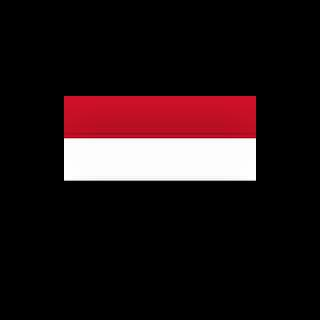

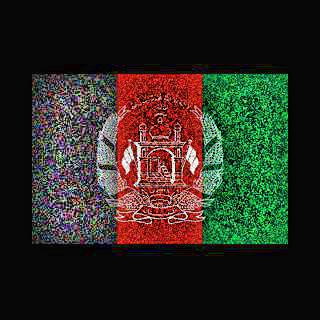

Accuracy for Afghanistan.1.jpg: 0.75
Predicted label for Afghanistan.1.jpg: ['Afghanistan']


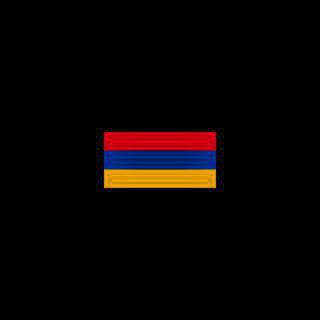

Accuracy for Armenia.1.jpg: 0.25
Predicted label for Armenia.1.jpg: ['Armenia']


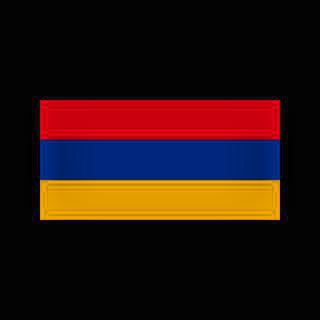

Accuracy for Armenia.2.jpg: 0.22
Predicted label for Armenia.2.jpg: ['Armenia']


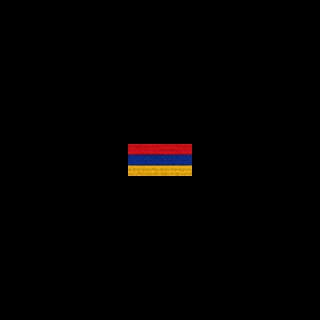

Accuracy for Armenia.3.jpg: 0.18
Predicted label for Armenia.3.jpg: ['Armenia']


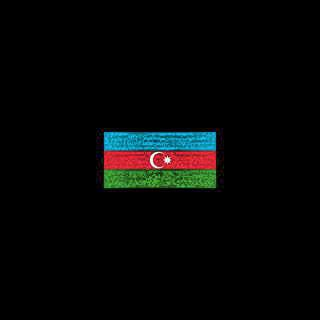

Accuracy for Azerbaijan.1.jpg: 0.5
Predicted label for Azerbaijan.1.jpg: ['Azerbaijan']


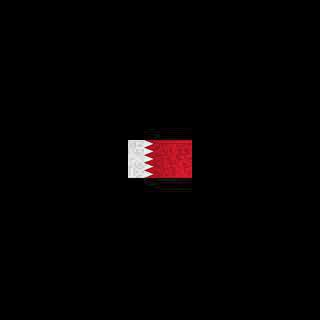

Accuracy for Bahrain.1.jpg: 0.29
Predicted label for Bahrain.1.jpg: ['Bahrain']


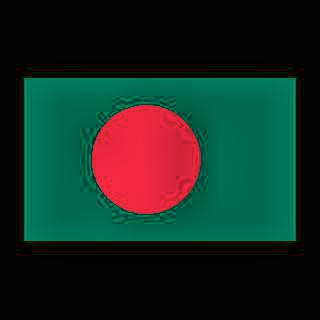

Accuracy for Bangladesh.1.jpg: 0.38
Predicted label for Bangladesh.1.jpg: ['Bangladesh']


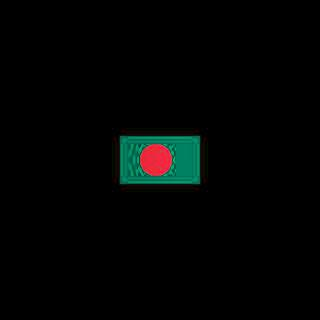

Accuracy for Bangladesh.2.jpg: 0.26
Predicted label for Bangladesh.2.jpg: ['Bangladesh']


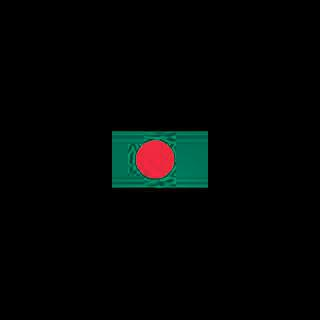

Accuracy for Bangladesh.3.jpg: 0.29
Predicted label for Bangladesh.3.jpg: ['Bangladesh']


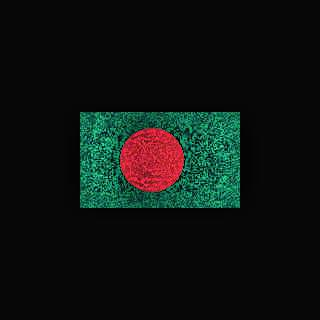

Accuracy for Bangladesh.4.jpg: 0.48
Predicted label for Bangladesh.4.jpg: ['Bangladesh']


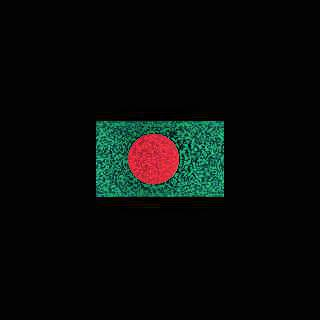

Accuracy for Bangladesh.5.jpg: 0.41
Predicted label for Bangladesh.5.jpg: ['Bangladesh']


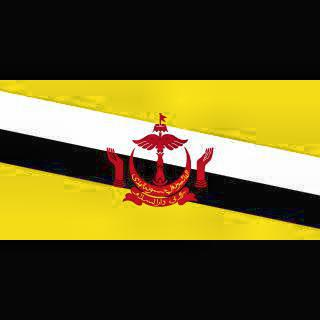

Accuracy for Brunei.1.jpg: 0.56
Predicted label for Brunei.1.jpg: ['Brunei']


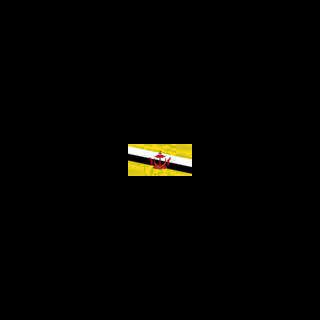

Accuracy for Brunei.2.jpg: 0.42
Predicted label for Brunei.2.jpg: ['Brunei']


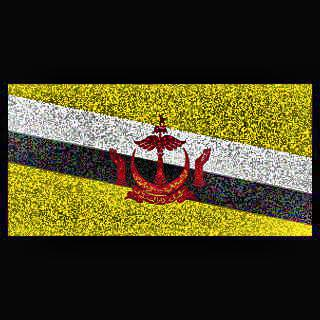

Accuracy for Brunei.3.jpg: 0.53
Predicted label for Brunei.3.jpg: ['Brunei']


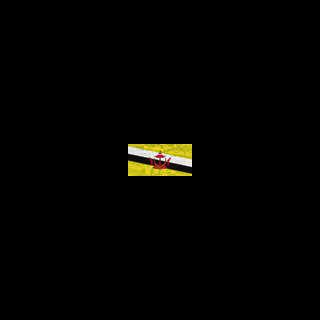

Accuracy for Brunei.4.jpg: 0.45
Predicted label for Brunei.4.jpg: ['Brunei']


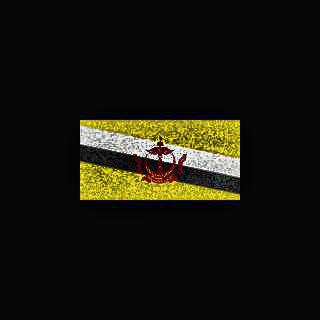

Accuracy for Brunei.5.jpg: 0.65
Predicted label for Brunei.5.jpg: ['Brunei']


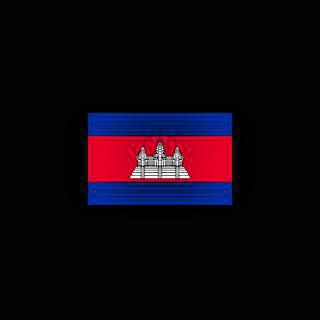

Accuracy for Cambodia.1.jpg: 0.48
Predicted label for Cambodia.1.jpg: ['Cambodia']


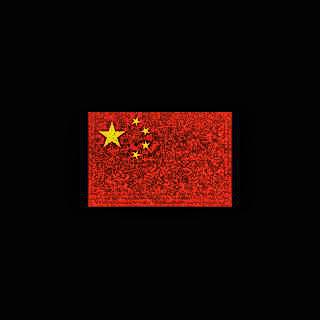

Accuracy for China.1.jpg: 0.73
Predicted label for China.1.jpg: ['China']


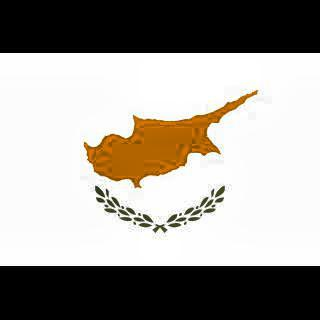

Accuracy for Cyprus.1.jpg: 0.8
Predicted label for Cyprus.1.jpg: ['Cyprus']


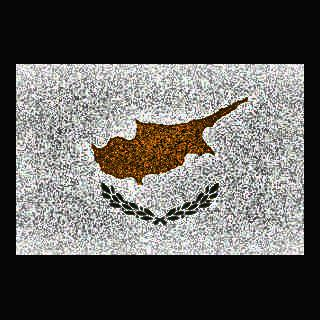

Accuracy for Cyprus.2.jpg: 0.66
Predicted label for Cyprus.2.jpg: ['Cyprus']


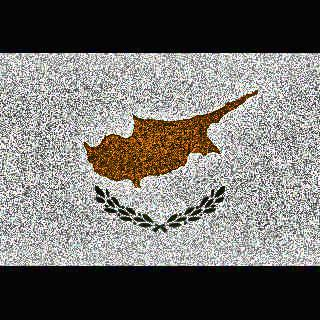

Accuracy for Cyprus.3.jpg: 0.61
Predicted label for Cyprus.3.jpg: ['Cyprus']


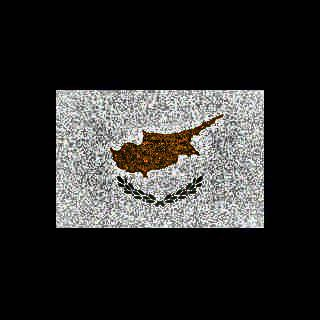

Accuracy for Cyprus.4.jpg: 0.67
Predicted label for Cyprus.4.jpg: ['Cyprus']


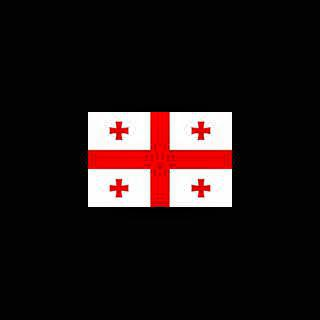

Accuracy for Georgia.1.jpg: 0.39
Predicted label for Georgia.1.jpg: ['Georgia']


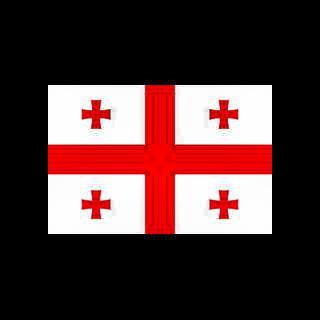

Accuracy for Georgia.2.jpg: 0.59
Predicted label for Georgia.2.jpg: ['Georgia']


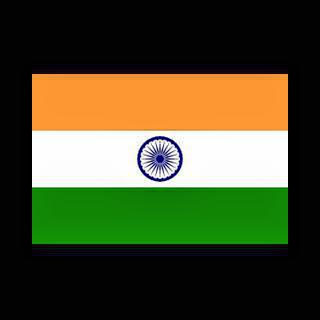

Accuracy for India.1.jpg: 0.48
Predicted label for India.1.jpg: ['India']


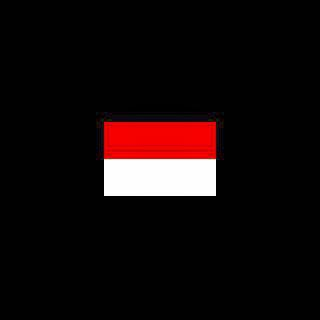

Accuracy for Indonesia.1.jpg: 0.38
Predicted label for Indonesia.1.jpg: ['Indonesia']


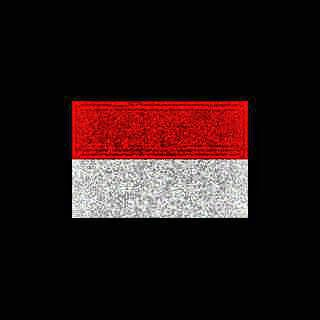

Accuracy for Indonesia.2.jpg: 0.52
Predicted label for Indonesia.2.jpg: ['Indonesia']


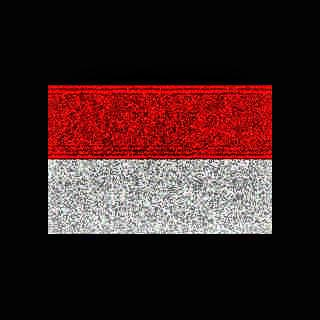

Accuracy for Indonesia.3.jpg: 0.63
Predicted label for Indonesia.3.jpg: ['Indonesia']


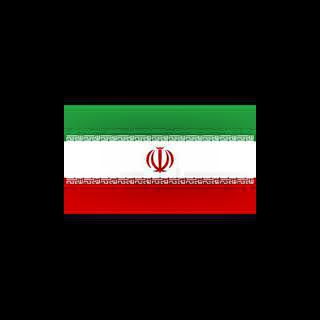

Accuracy for Iran.1.jpg: 0.62
Predicted label for Iran.1.jpg: ['Iran']


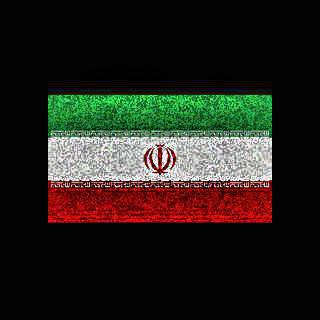

Accuracy for Iran.2.jpg: 0.76
Predicted label for Iran.2.jpg: ['Iran']


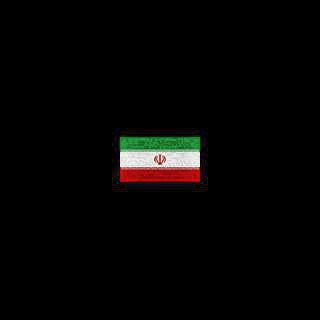

Accuracy for Iran.3.jpg: 0.3
Predicted label for Iran.3.jpg: ['Iran']


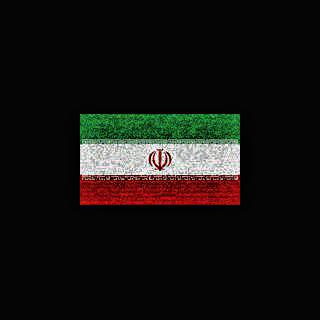

Accuracy for Iran.4.jpg: 0.36
Predicted label for Iran.4.jpg: ['Iran']


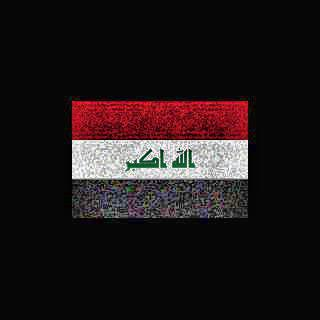

Accuracy for Iraq.1.jpg: 0.47
Predicted label for Iraq.1.jpg: ['Iraq']


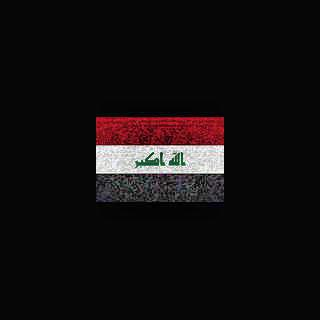

Accuracy for Iraq.2.jpg: 0.37
Predicted label for Iraq.2.jpg: ['Iraq']


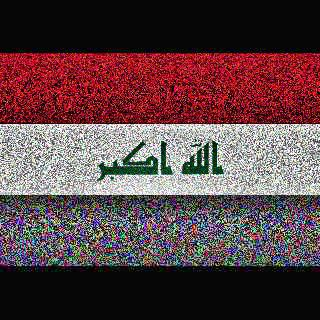

Accuracy for Iraq.3.jpg: 0.29
Predicted label for Iraq.3.jpg: ['Syria']


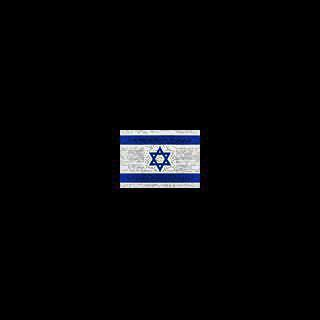

Accuracy for Israel.1.jpg: 0.91
Predicted label for Israel.1.jpg: ['Israel']


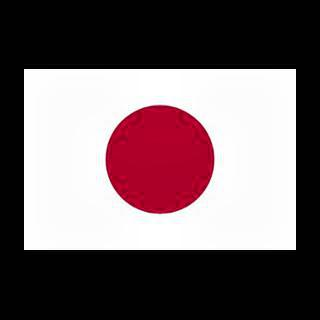

Accuracy for Japan.1.jpg: 0.68
Predicted label for Japan.1.jpg: ['Japan']


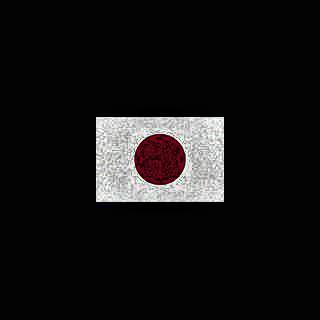

Accuracy for Japan.2.jpg: 0.4
Predicted label for Japan.2.jpg: ['Japan']


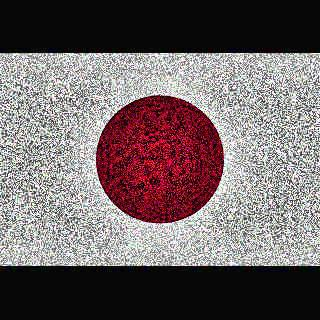

Accuracy for Japan.3.jpg: 0.29
Predicted label for Japan.3.jpg: ['Japan']


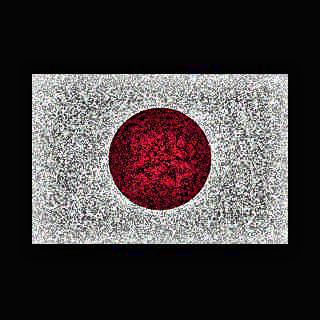

Accuracy for Japan.4.jpg: 0.35
Predicted label for Japan.4.jpg: ['Japan']


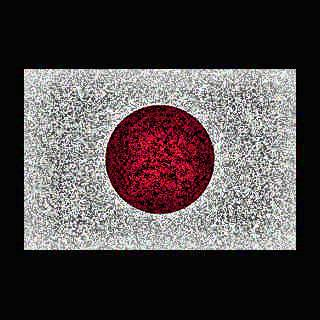

Accuracy for Japan.5.jpg: 0.44
Predicted label for Japan.5.jpg: ['Japan']


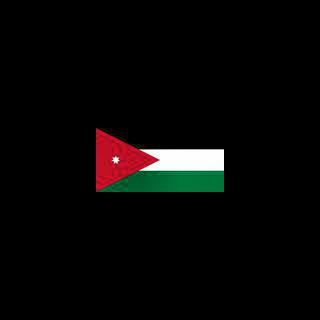

Accuracy for Jordan.1.jpg: 0.14
Predicted label for Jordan.1.jpg: ['Jordan']


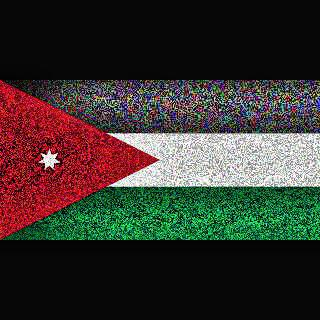

Accuracy for Jordan.2.jpg: 0.48
Predicted label for Jordan.2.jpg: ['Jordan']


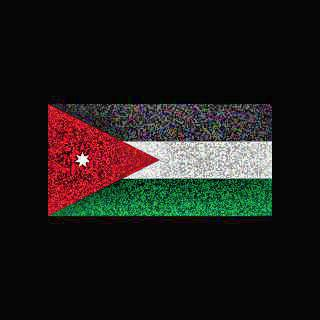

Accuracy for Jordan.3.jpg: 0.3
Predicted label for Jordan.3.jpg: ['Palestine']


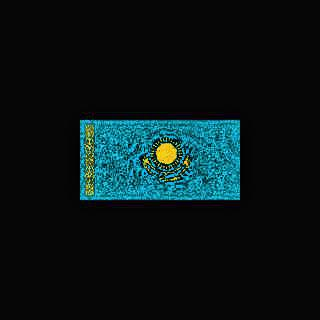

Accuracy for Kazakhstan.1.jpg: 0.75
Predicted label for Kazakhstan.1.jpg: ['Kazakhstan']


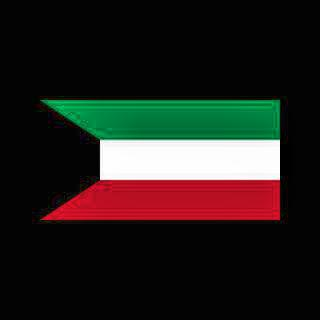

Accuracy for Kuwait.1.jpg: 0.33
Predicted label for Kuwait.1.jpg: ['Kuwait']


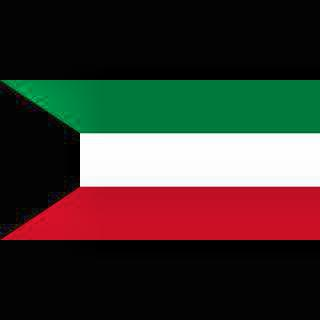

Accuracy for Kuwait.2.jpg: 0.37
Predicted label for Kuwait.2.jpg: ['Kuwait']


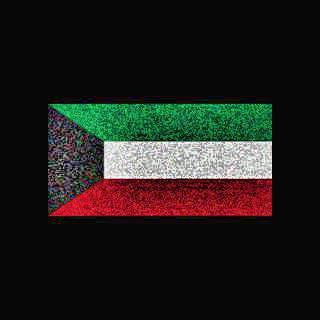

Accuracy for Kuwait.3.jpg: 0.32
Predicted label for Kuwait.3.jpg: ['Kuwait']


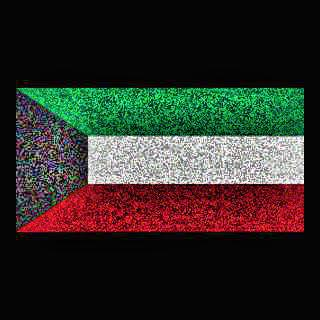

Accuracy for Kuwait.4.jpg: 0.32
Predicted label for Kuwait.4.jpg: ['Kuwait']


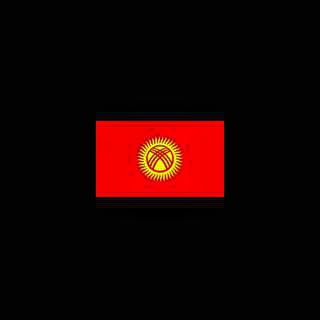

Accuracy for Kyrgyzstan.1.jpg: 0.36
Predicted label for Kyrgyzstan.1.jpg: ['China']


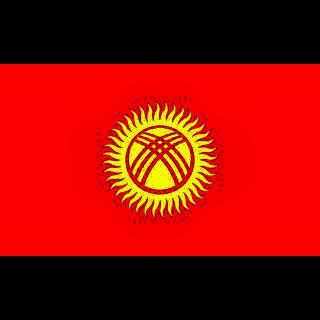

Accuracy for Kyrgyzstan.2.jpg: 0.8
Predicted label for Kyrgyzstan.2.jpg: ['Kyrgyzstan']


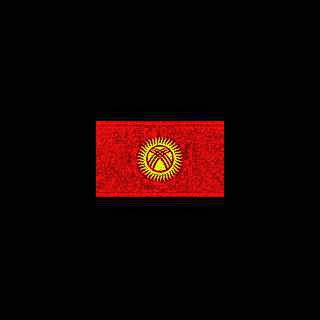

Accuracy for Kyrgyzstan.3.jpg: 0.55
Predicted label for Kyrgyzstan.3.jpg: ['Kyrgyzstan']


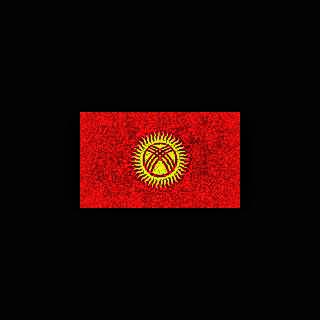

Accuracy for Kyrgyzstan.4.jpg: 0.81
Predicted label for Kyrgyzstan.4.jpg: ['Kyrgyzstan']


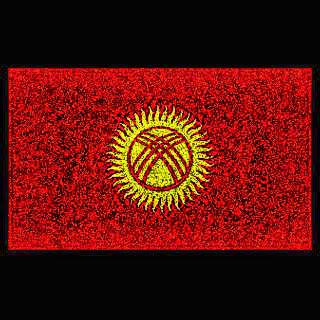

Accuracy for Kyrgyzstan.5.jpg: 0.87
Predicted label for Kyrgyzstan.5.jpg: ['Kyrgyzstan']


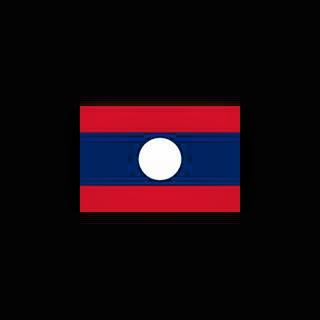

Accuracy for Laos.1.jpg: 0.42
Predicted label for Laos.1.jpg: ['Laos']


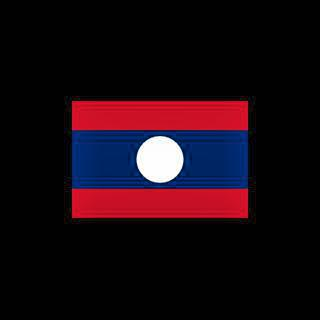

Accuracy for Laos.2.jpg: 0.63
Predicted label for Laos.2.jpg: ['Laos']


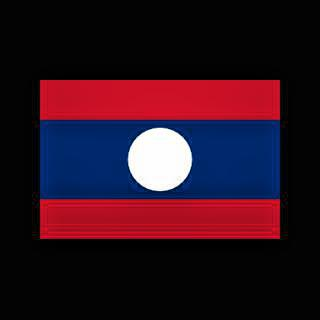

Accuracy for Laos.3.jpg: 0.68
Predicted label for Laos.3.jpg: ['Laos']


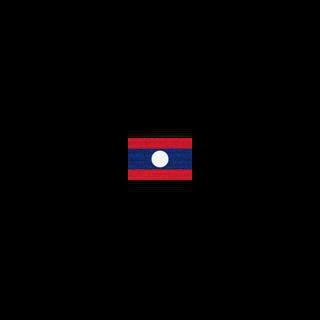

Accuracy for Laos.4.jpg: 0.28
Predicted label for Laos.4.jpg: ['Laos']


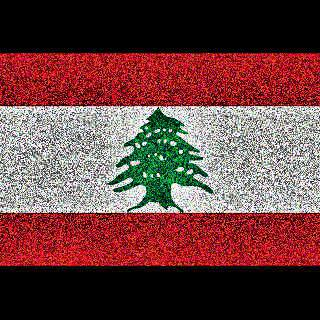

Accuracy for Lebanon.1.jpg: 0.36
Predicted label for Lebanon.1.jpg: ['Lebanon']


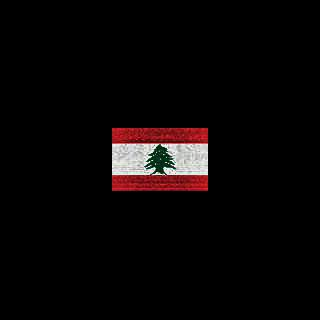

Accuracy for Lebanon.2.jpg: 0.18
Predicted label for Lebanon.2.jpg: ['Lebanon']


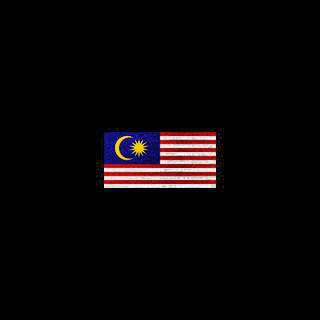

Accuracy for Malaysia.1.jpg: 0.55
Predicted label for Malaysia.1.jpg: ['Malaysia']


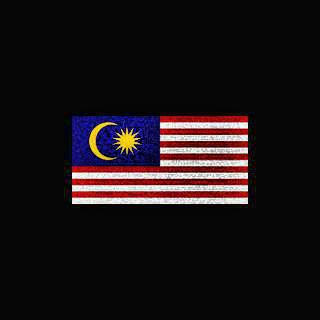

Accuracy for Malaysia.2.jpg: 0.79
Predicted label for Malaysia.2.jpg: ['Malaysia']


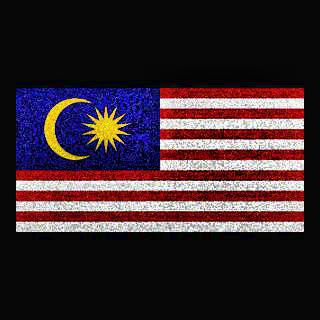

Accuracy for Malaysia.3.jpg: 0.91
Predicted label for Malaysia.3.jpg: ['Malaysia']


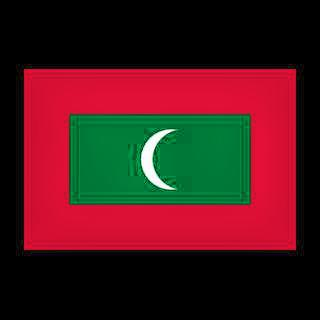

Accuracy for Maldives.1.jpg: 0.4
Predicted label for Maldives.1.jpg: ['Maldives']


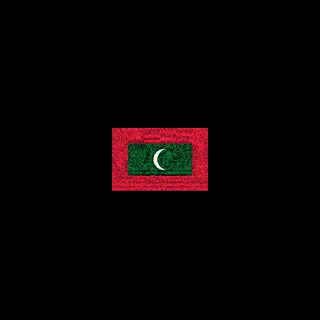

Accuracy for Maldives.2.jpg: 0.28
Predicted label for Maldives.2.jpg: ['Maldives']


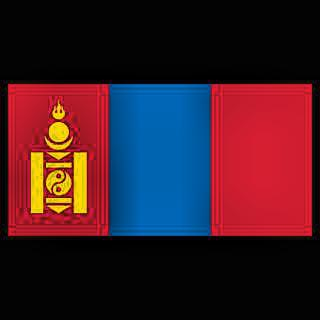

Accuracy for Mongolia.1.jpg: 0.53
Predicted label for Mongolia.1.jpg: ['Mongolia']


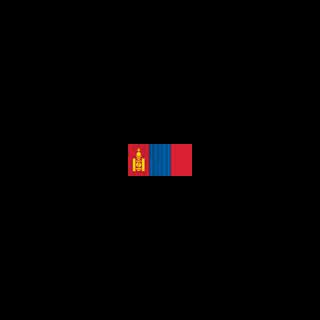

Accuracy for Mongolia.2.jpg: 0.25
Predicted label for Mongolia.2.jpg: ['China']


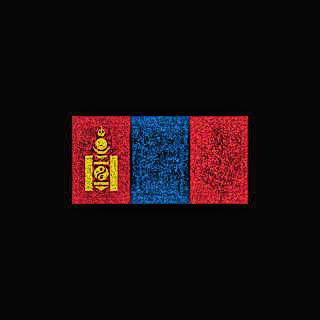

Accuracy for Mongolia.3.jpg: 0.77
Predicted label for Mongolia.3.jpg: ['Mongolia']


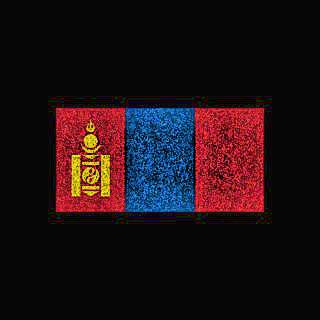

Accuracy for Mongolia.4.jpg: 0.88
Predicted label for Mongolia.4.jpg: ['Mongolia']


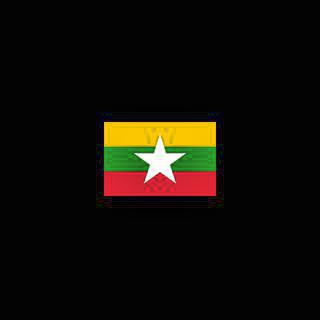

Accuracy for Myanmar.1.jpg: 0.37
Predicted label for Myanmar.1.jpg: ['Myanmar']


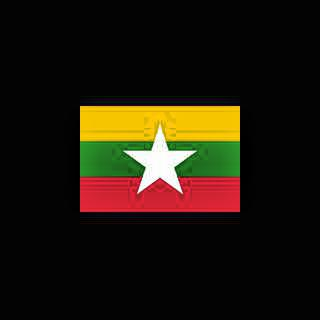

Accuracy for Myanmar.2.jpg: 0.43
Predicted label for Myanmar.2.jpg: ['Myanmar']


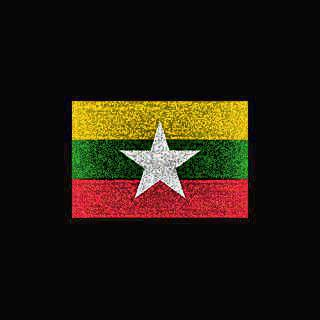

Accuracy for Myanmar.3.jpg: 0.83
Predicted label for Myanmar.3.jpg: ['Myanmar']


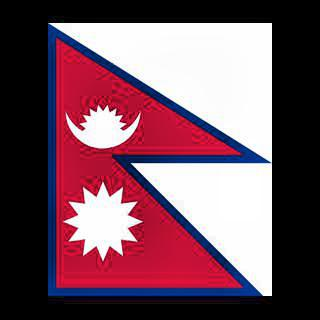

Accuracy for Nepal.1.jpg: 0.71
Predicted label for Nepal.1.jpg: ['Nepal']


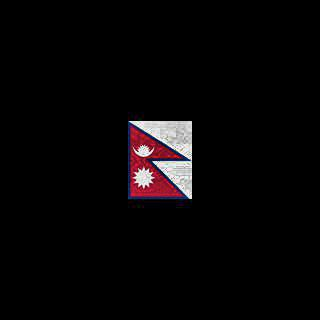

Accuracy for Nepal.2.jpg: 0.27
Predicted label for Nepal.2.jpg: ['Nepal']


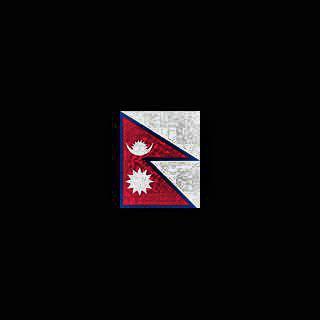

Accuracy for Nepal.3.jpg: 0.34
Predicted label for Nepal.3.jpg: ['Nepal']


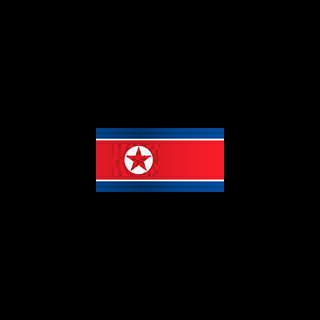

Accuracy for North Korea.1.jpg: 0.37
Predicted label for North Korea.1.jpg: ['North Korea']


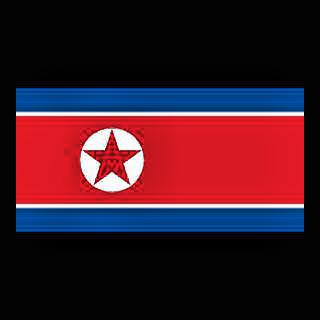

Accuracy for North Korea.2.jpg: 0.38
Predicted label for North Korea.2.jpg: ['North Korea']


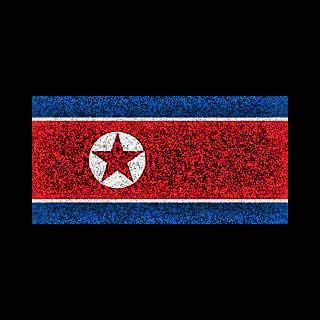

Accuracy for North Korea.3.jpg: 0.74
Predicted label for North Korea.3.jpg: ['North Korea']


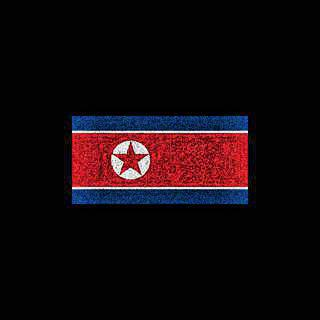

Accuracy for North Korea.4.jpg: 0.65
Predicted label for North Korea.4.jpg: ['North Korea']


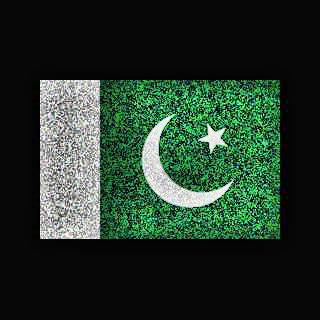

Accuracy for Pakistan.1.jpg: 0.87
Predicted label for Pakistan.1.jpg: ['Pakistan']


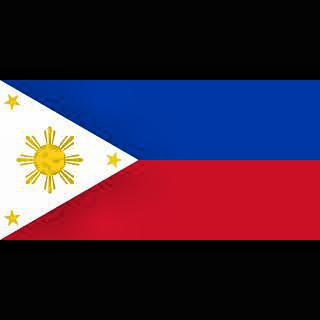

Accuracy for Philippines.1.jpg: 0.62
Predicted label for Philippines.1.jpg: ['Philippines']


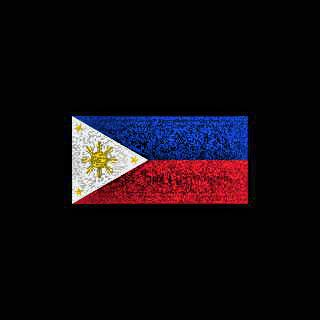

Accuracy for Philippines.2.jpg: 0.89
Predicted label for Philippines.2.jpg: ['Philippines']


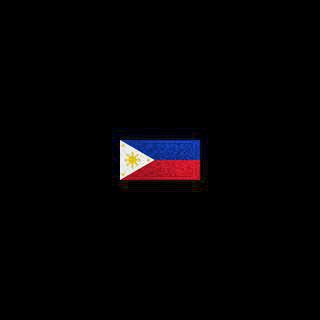

Accuracy for Philippines.3.jpg: 0.55
Predicted label for Philippines.3.jpg: ['Philippines']


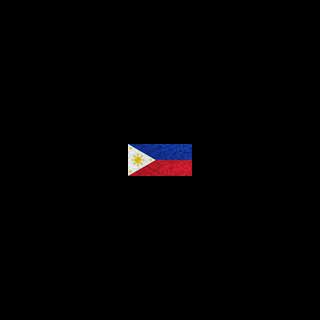

Accuracy for Philippines.4.jpg: 0.36
Predicted label for Philippines.4.jpg: ['Philippines']


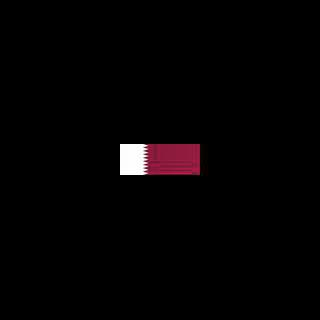

Accuracy for Qatar.1.jpg: 0.58
Predicted label for Qatar.1.jpg: ['Qatar']


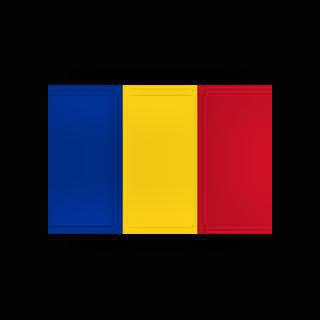

Accuracy for Oman.1.jpg: 0.18
Predicted label for Oman.1.jpg: ['Armenia']


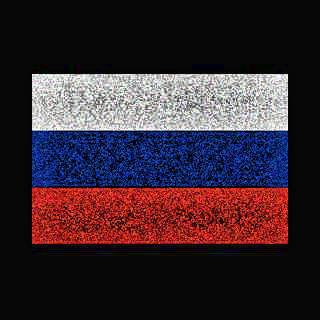

Accuracy for Russia.1.jpg: 0.52
Predicted label for Russia.1.jpg: ['Russia']


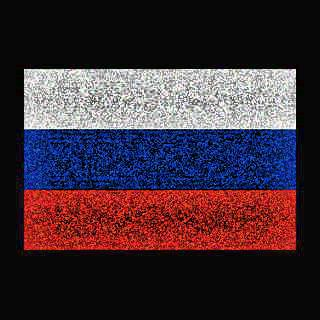

Accuracy for Russia.2.jpg: 0.49
Predicted label for Russia.2.jpg: ['Russia']


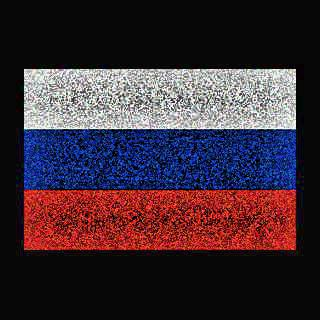

Accuracy for Russia.3.jpg: 0.47
Predicted label for Russia.3.jpg: ['Russia']


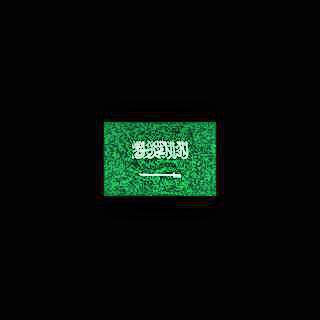

Accuracy for Saudi Arabia.1.jpg: 0.79
Predicted label for Saudi Arabia.1.jpg: ['Saudi Arabia']


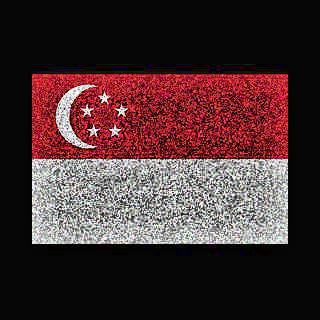

Accuracy for Singapore.1.jpg: 0.64
Predicted label for Singapore.1.jpg: ['Singapore']


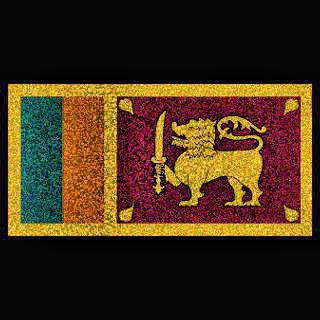

Accuracy for Sri Lanka.1.jpg: 0.69
Predicted label for Sri Lanka.1.jpg: ['Sri Lanka']


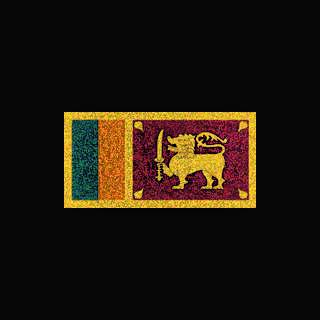

Accuracy for Sri Lanka.2.jpg: 0.93
Predicted label for Sri Lanka.2.jpg: ['Sri Lanka']


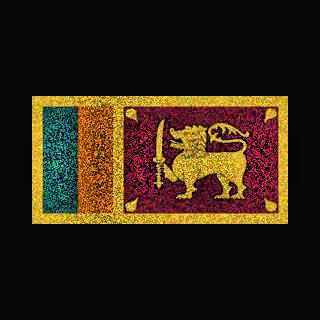

Accuracy for Sri Lanka.3.jpg: 0.7
Predicted label for Sri Lanka.3.jpg: ['Sri Lanka']


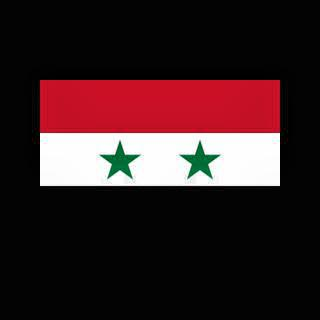

Accuracy for Syria.1.jpg: 0.31
Predicted label for Syria.1.jpg: ['Syria']


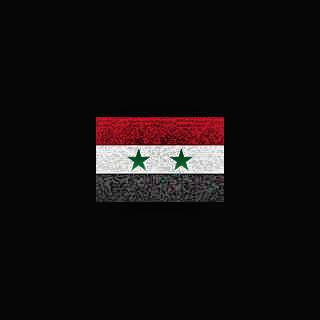

Accuracy for Syria.2.jpg: 0.36
Predicted label for Syria.2.jpg: ['Iraq']


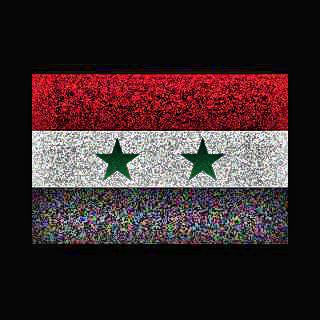

Accuracy for Syria.3.jpg: 0.32
Predicted label for Syria.3.jpg: ['Yemen']


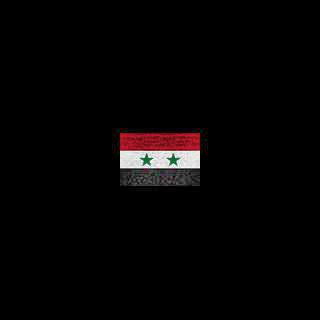

Accuracy for Syria.4.jpg: 0.45
Predicted label for Syria.4.jpg: ['Iraq']


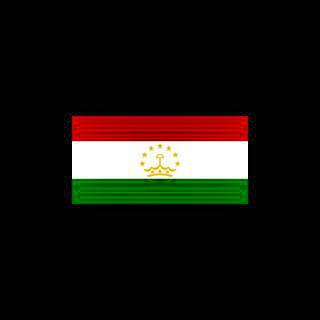

Accuracy for Tajikistan.1.jpg: 0.45
Predicted label for Tajikistan.1.jpg: ['Tajikistan']


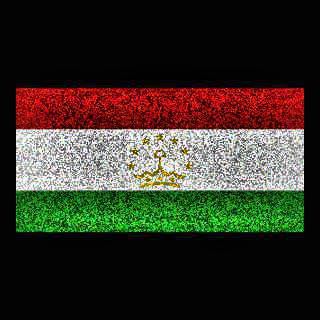

Accuracy for Tajikistan.2.jpg: 0.71
Predicted label for Tajikistan.2.jpg: ['Tajikistan']


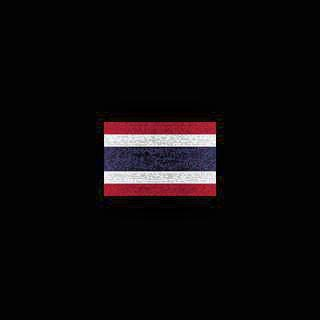

Accuracy for Thailand.1.jpg: 0.26
Predicted label for Thailand.1.jpg: ['Thailand']


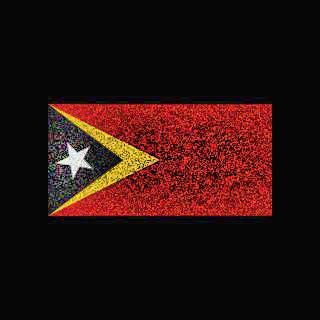

Accuracy for Timor-Leste.1.jpg: 0.56
Predicted label for Timor-Leste.1.jpg: ['Timor-Leste']


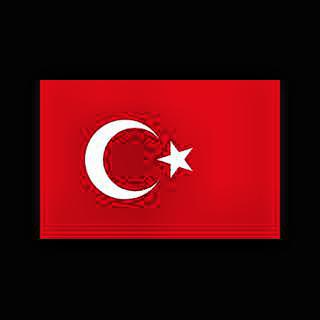

Accuracy for Turkey.1.jpg: 0.36
Predicted label for Turkey.1.jpg: ['Turkey']


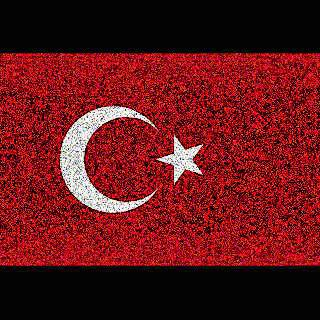

Accuracy for Turkey.2.jpg: 0.27
Predicted label for Turkey.2.jpg: ['Singapore']


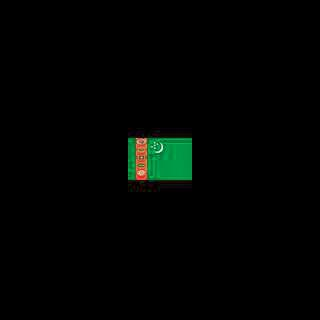

Accuracy for Turkmenistan.1.jpg: 0.36
Predicted label for Turkmenistan.1.jpg: ['Turkmenistan']


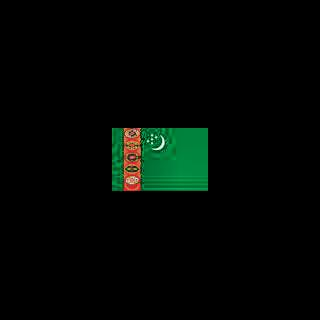

Accuracy for Turkmenistan.2.jpg: 0.59
Predicted label for Turkmenistan.2.jpg: ['Turkmenistan']


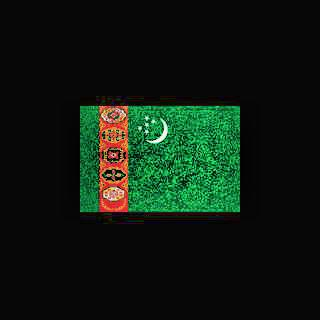

Accuracy for Turkmenistan.3.jpg: 0.82
Predicted label for Turkmenistan.3.jpg: ['Turkmenistan']


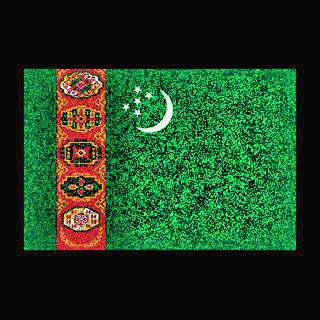

Accuracy for Turkmenistan.4.jpg: 0.94
Predicted label for Turkmenistan.4.jpg: ['Turkmenistan']


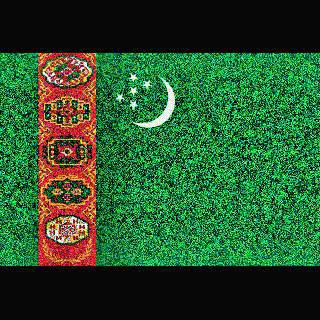

Accuracy for Turkmenistan.5.jpg: 0.68
Predicted label for Turkmenistan.5.jpg: ['Turkmenistan']


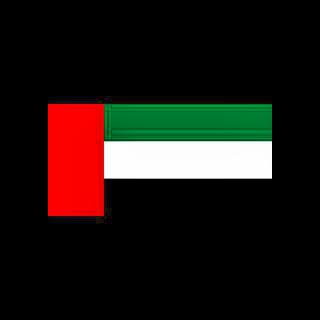

Accuracy for United Arab Emirates.1.jpg: 0.28
Predicted label for United Arab Emirates.1.jpg: ['United Arab Emirates']


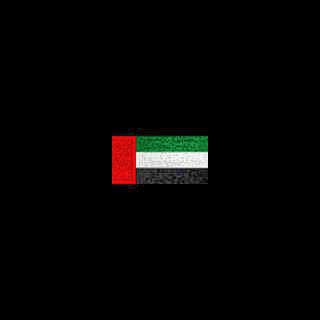

Accuracy for United Arab Emirates.2.jpg: 0.29
Predicted label for United Arab Emirates.2.jpg: ['United Arab Emirates']


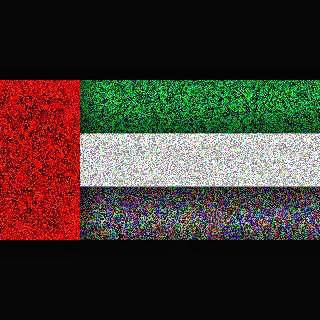

Accuracy for United Arab Emirates.3.jpg: 0.24
Predicted label for United Arab Emirates.3.jpg: ['United Arab Emirates']


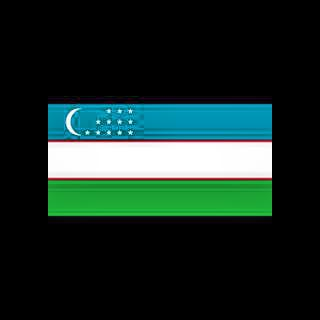

Accuracy for Uzbekistan.1.jpg: 0.32
Predicted label for Uzbekistan.1.jpg: ['Uzbekistan']


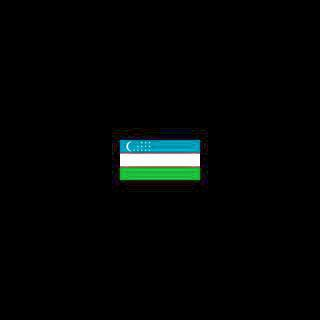

Accuracy for Uzbekistan.2.jpg: 0.21
Predicted label for Uzbekistan.2.jpg: ['Uzbekistan']


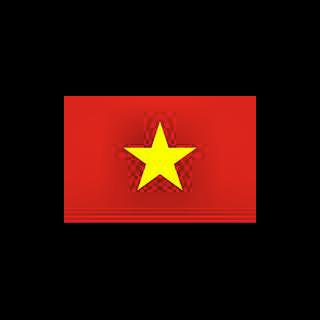

Accuracy for Vietnam.1.jpg: 0.55
Predicted label for Vietnam.1.jpg: ['Vietnam']


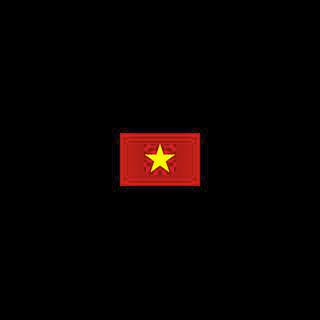

Accuracy for Vietnam.2.jpg: 0.48
Predicted label for Vietnam.2.jpg: ['Vietnam']


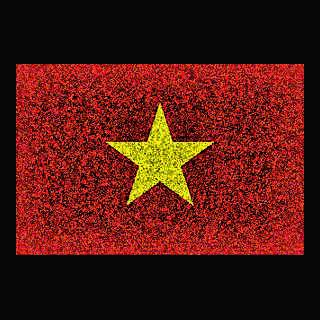

Accuracy for Vietnam.3.jpg: 0.72
Predicted label for Vietnam.3.jpg: ['Vietnam']


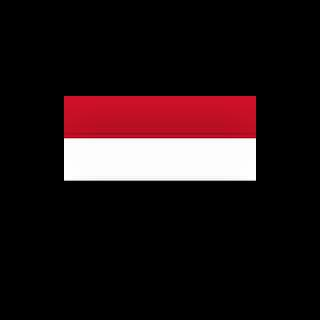

Accuracy for Yemen.1.jpg: 0.32
Predicted label for Yemen.1.jpg: ['Indonesia']


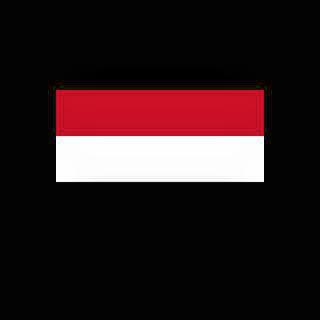

Accuracy for Yemen.2.jpg: 0.19
Predicted label for Yemen.2.jpg: ['Yemen']


In [ ]:
image_path = "/gdrive/MyDrive/TrainModel/Dataset/test/Yemen.1.jpg"
from google.colab.patches import cv2_imshow
image = cv2.imread(image_path)
cv2_imshow(image)
# Trích xuất đặc trưng từ ảnh
hist =  extract_color_histogram(image)

# Reshape đặc trưng để phù hợp với mô hình
hist = hist.reshape(1,-1)

# Dự đoán nhãn của ảnh
predicted_label = rf_model.predict(hist)
probabilities = rf_model.predict_proba(hist)# Đường dẫn tới thư mục chứa các tệp ảnh
folder_path = "/gdrive/MyDrive/TrainModel/Dataset/test/"

# Liệt kê tất cả các tệp trong thư mục
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

# Duyệt qua từng tệp ảnh trong thư mục
for image_file in image_files:
    # Đường dẫn đầy đủ tới tệp ảnh
    image_path = os.path.join(folder_path, image_file)

    # Đọc và hiển thị ảnh
    image = cv2.imread(image_path)
    cv2_imshow(image)

    # Trích xuất đặc trưng từ ảnh
    hist = extract_color_histogram(image)

    # Reshape đặc trưng để phù hợp với mô hình
    hist = hist.reshape(1, -1)

    # Dự đoán nhãn của ảnh
    predicted_label = rf_model.predict(hist)
    probabilities = rf_model.predict_proba(hist)

    # Tìm chỉ mục của nhãn được dự đoán trong danh sách nhãn của mô hình
    label_index = np.where(rf_model.classes_ == predicted_label)[0][0]

    # In độ chính xác cho nhãn được dự đoán
    print("Accuracy for {}: {}".format(image_file, probabilities[0][label_index]))

    # In kết quả dự đoán
    print("Predicted label for {}: {}".format(image_file, predicted_label))



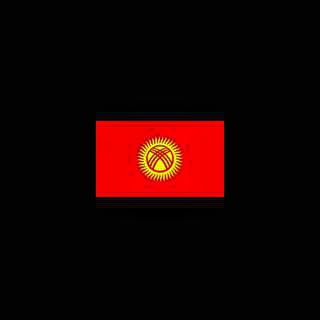

Predicted label: ['China']


In [ ]:
image_path = "/gdrive/MyDrive/TrainModel/Dataset/test/Kyrgyzstan.1.jpg"
from google.colab.patches import cv2_imshow
image = cv2.imread(image_path)
cv2_imshow(image)
# Trích xuất đặc trưng từ ảnh
hist =  extract_color_histogram(image)

# Reshape đặc trưng để phù hợp với mô hình
hist = hist.reshape(1,-1)

# Dự đoán nhãn của ảnh
predicted_label = rf_model.predict(hist)
probabilities = rf_model.predict_proba(hist)

# Tìm chỉ mục của nhãn được dự đoán trong danh sách nhãn của mô hình
label_index = np.where(rf_model.classes_ == predicted_label)[0][0]

# In kết quả dự đoán
print("Predicted label:", predicted_label)